# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Import data

In [2]:
netflix = pd.read_csv("F:/CSIS 3764/2023/Assignmentrs/Ass2_2018189098/netflix.csv")


In [3]:
netflix.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Descriptive stats

In [4]:
netflix.describe(include='all')

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
count,2500.00000,2500,2500.000000,2500,2500,2500,2500.000000,2500,2500,2500
unique,NaN,3,NaN,300,26,10,NaN,2,4,1
top,NaN,Basic,NaN,05-11-22,28-06-23,United States,NaN,Female,Laptop,1 Month
freq,NaN,999,NaN,33,164,451,NaN,1257,636,2500
mean,1250.50000,NaN,12.508400,NaN,NaN,NaN,38.795600,NaN,NaN,NaN
std,721.83216,NaN,1.686851,NaN,NaN,NaN,7.171778,NaN,NaN,NaN
min,1.00000,NaN,10.000000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN
25%,625.75000,NaN,11.000000,NaN,NaN,NaN,32.000000,NaN,NaN,NaN
50%,1250.50000,NaN,12.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN
75%,1875.25000,NaN,14.000000,NaN,NaN,NaN,45.000000,NaN,NaN,NaN


# Inspect data

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
print('Row count: ', netflix.shape[0])
print('Column count: ', netflix.shape[1])

Row count:  2500
Column count:  10


In [7]:
netflix.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [8]:
netflix.dtypes


User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [9]:
corr = netflix.corr()
corr

,User ID,Monthly Revenue,Age
User ID,1.000000,-0.004809,0.008065
Monthly Revenue,-0.004809,1.000000,-0.021143
Age,0.008065,-0.021143,1.000000


# Plot graph

In [10]:
netflix.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


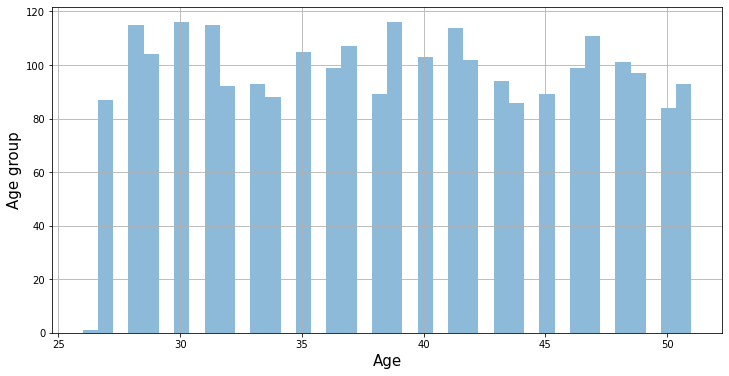

In [14]:

netflix['Age'].hist(density=0, histtype='stepfilled', alpha=.5, bins=40,figsize=(12,6))
plt.xlabel('Age',fontsize=15)
plt.ylabel('Age group',fontsize=15)
plt.show()

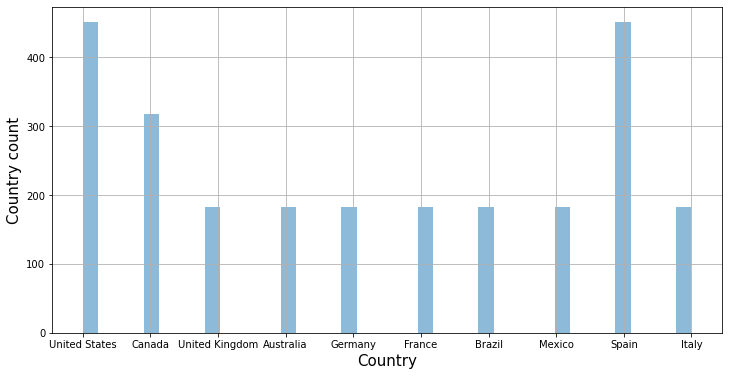

In [15]:

netflix['Country'].hist(density=0, histtype='stepfilled', alpha=.5, bins=40,figsize=(12,6))
plt.xlabel('Country',fontsize=15)
plt.ylabel('Country count',fontsize=15)
plt.show()

In [16]:
grouped = netflix.groupby(['Age','Country'])['Age'].mean().unstack()
grouped.head()

Country,Australia,Brazil,Canada,France,Germany,Italy,Mexico,Spain,United Kingdom,United States
Age,,,,,,,,,,
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
27,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
28,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
29,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
30,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0


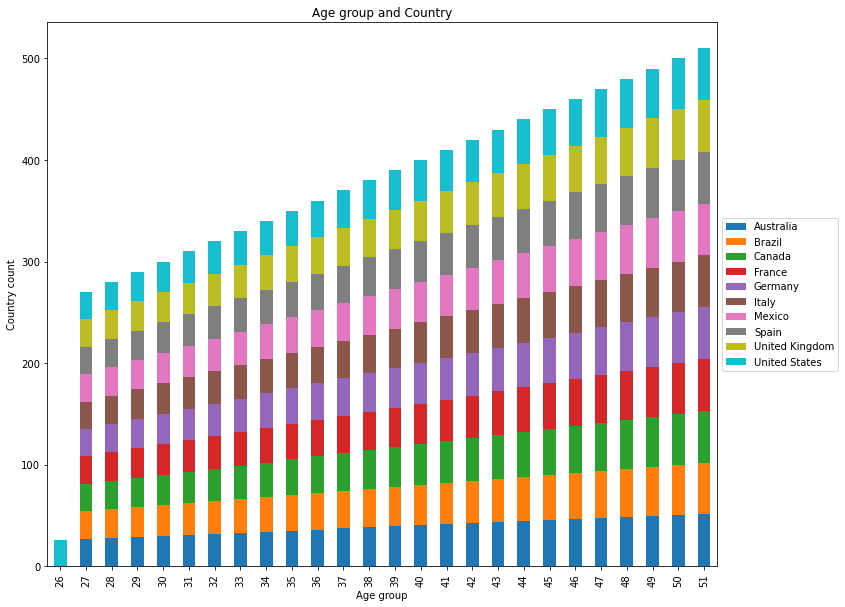

In [17]:
grouped.plot(kind='bar', stacked= True,figsize=(12,10))
plt.xlabel('Age group')
plt.ylabel('Country count')
plt.title('Age group and Country')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

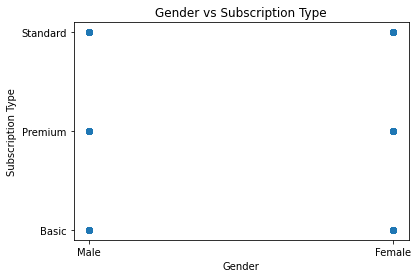

In [18]:
plt.scatter(netflix['Gender'], netflix['Subscription Type'])
plt.xlabel('Gender')
plt.ylabel('Subscription Type')
plt.title('Gender vs Subscription Type')
plt.show()

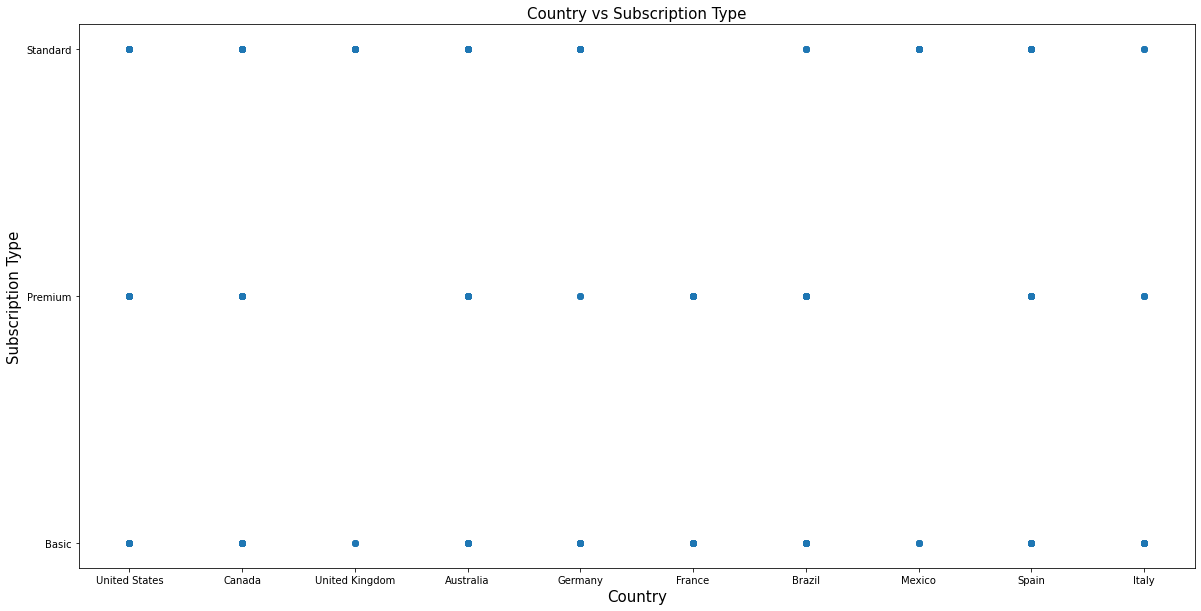

In [19]:
plt.scatter(netflix['Country'], netflix['Subscription Type'])
plt.xlabel('Country', fontsize=15)
plt.ylabel('Subscription Type', fontsize=15)
plt.title('Country vs Subscription Type', fontsize=15)
plt.gcf().set_size_inches((20,10))
plt.show()

# Interpretation

*Age group vs Subscribed Countries

Only the 26 Age group of United States subscribed
from 27 to 51 Age group all countries subscribed and the higher the age group the more subscription increases

*Subscription type vs Gender and Country

All genders subscribed to all types of Subscription(Basic, Premium, Standard).

Countries such as United kingdom and Mexico didn't subscribe to Premium. France didn't subscribe subscribe to Standard. 
Then all other Contries subscribed to all types of Subscription(Basic, Premium, Standard).

# Clean the data

In [20]:
netflix.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [21]:
print(f"Subscription Type: {netflix['Subscription Type'].unique()}\n")
print(f"Country: {netflix['Country'].unique()}\n")
print(f"Gender: {netflix['Gender'].unique()}\n")
print(f"Device: {netflix['Device'].unique()}\n")
print(f"Plan Duration: {netflix['Plan Duration'].unique()}\n")
print(f"Join Date: {netflix['Join Date'].unique()}\n")
print(f"Last Payment Date: {netflix['Last Payment Date'].unique()}\n")

Subscription Type: ['Basic' 'Premium' 'Standard']

Country: ['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']

Gender: ['Male' 'Female']

Device: ['Smartphone' 'Tablet' 'Smart TV' 'Laptop']

Plan Duration: ['1 Month']

Join Date: ['15-01-22' '05-09-21' '28-02-23' '10-07-22' '01-05-23' '18-03-22'
 '09-12-21' '02-04-23' '20-10-22' '07-01-23' '16-05-22' '23-03-23'
 '30-11-21' '01-08-22' '09-05-23' '07-04-22' '24-01-22' '18-10-21'
 '15-02-23' '27-05-23' '10-06-23' '22-07-22' '05-12-21' '03-04-22'
 '14-03-23' '12-01-22' '29-08-22' '27-09-21' '19-12-22' '17-05-23'
 '03-02-23' '07-07-22' '21-01-22' '25-05-22' '11-04-23' '01-03-22'
 '14-09-22' '05-11-21' '28-12-22' '07-03-23' '20-01-23' '15-06-22'
 '07-02-22' '26-04-22' '28-01-23' '23-02-22' '05-10-22' '15-09-21'
 '10-11-22' '02-06-23' '27-02-23' '13-01-22' '30-06-22' '20-04-23'
 '15-03-22' '01-10-22' '08-10-21' '03-12-22' '14-06-23' '08-02-23'
 '03-08-22' '20-06-22' '29-03-23' '30-01

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

netflix['Subscription Type'] = label_encoder.fit_transform(netflix['Subscription Type'])
netflix['Country'] = label_encoder.fit_transform(netflix['Country'])
netflix['Gender'] = label_encoder.fit_transform(netflix['Gender'])
netflix['Device'] = label_encoder.fit_transform(netflix['Device'])
netflix['Plan Duration'] = label_encoder.fit_transform(netflix['Plan Duration'])
netflix['Join Date'] = label_encoder.fit_transform(netflix['Join Date'])
#netflix['Last Payment Date'] = label_encoder.fit_transform(netflix['Last Payment Date'])

netflix.head(20)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,0,10,142,10-06-23,9,28,1,2,0
1,2,1,15,45,22-06-23,2,35,0,3,0
2,3,2,12,267,27-06-23,8,42,1,1,0
3,4,2,12,95,26-06-23,0,51,0,0,0
4,5,0,10,1,28-06-23,4,33,1,2,0
5,6,1,15,169,27-06-23,3,29,0,1,0
6,7,2,12,91,25-06-23,1,46,1,3,0
7,8,0,10,8,24-06-23,6,39,0,0,0
8,9,2,12,195,23-06-23,7,37,1,2,0
9,10,1,15,58,22-06-23,5,44,0,1,0


In [23]:
netflix['Last Payment Date'] = pd.to_datetime(netflix['Last Payment Date'],errors='coerce')

In [24]:
netflix['Last Payment Date'] = netflix['Last Payment Date'].dt.strftime('%d%m%Y').astype(int)

In [25]:
netflix['Last Payment Date']

0        6102023
1       22062023
2       27062023
3       26062023
4       28062023
          ...   
2495     7122023
2496    14072023
2497    15072023
2498     7122023
2499     7122023
Name: Last Payment Date, Length: 2500, dtype: int32


#The data is in numerical form

In [26]:
netflix.dtypes

User ID              int64
Subscription Type    int32
Monthly Revenue      int64
Join Date            int32
Last Payment Date    int32
Country              int32
Age                  int64
Gender               int32
Device               int32
Plan Duration        int32
dtype: object

In [28]:
std_scaler = StandardScaler()
netflix_scaled = std_scaler.fit_transform(netflix.to_numpy())
netflix_clean = pd.DataFrame(netflix_scaled, columns = netflix.columns)

netflix_clean.head(20)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,-1.731358,-1.086139,-1.487328,-0.069858,-0.842453,1.306577,-1.505590,1.005616,0.444163,0.0
1,-1.729972,0.110576,1.477367,-1.169969,0.808132,-1.048464,-0.529347,-0.994416,1.333202,0.0
2,-1.728587,1.307291,-0.301450,1.347810,1.325232,0.970142,0.446896,1.005616,-0.444875,0.0
3,-1.727201,1.307291,-0.301450,-0.602901,1.221812,-1.721333,1.702066,-0.994416,-1.333913,0.0
4,-1.725816,-1.086139,-1.487328,-1.668988,1.428652,-0.375595,-0.808274,1.005616,0.444163,0.0
5,-1.724430,0.110576,1.477367,0.236358,1.325232,-0.712030,-1.366127,-0.994416,-0.444875,0.0
6,-1.723044,1.307291,-0.301450,-0.648267,1.118392,-1.384899,1.004750,1.005616,1.333202,0.0
7,-1.721659,-1.086139,-1.487328,-1.589599,1.014972,0.297273,0.028506,-0.994416,-1.333913,0.0
8,-1.720273,1.307291,-0.301450,0.531233,0.911552,0.633708,-0.250420,1.005616,0.444163,0.0
9,-1.718887,0.110576,1.477367,-1.022531,0.808132,-0.039161,0.725823,-0.994416,-0.444875,0.0


# Pre-processed data to CSV

In [29]:
netflix_clean.to_csv('clean_netflix.csv', index=False, encoding='utf-8')